- the table wich we store data is a Data Frame 
- Data Frime ins a 2D data structure that can store data of different types
- each column in a DF is a Series


#carregando dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

directory = r'/content/drive/MyDrive/PSYCHOPY/resultados'
files = os.listdir(directory)

data=[]

for filename in files:
    path = os.path.join(directory, filename) 

    if os.path.isfile(path):
        df = pd.read_excel(path)
        data.append(df)

___________________________________________________________________________
#resultado individual

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/PSYCHOPY/resultados/eric_resp.xlsx')

In [ ]:
rt1 = []
for i in range(1,5):
    rt = df.loc[ df["key_resp_{}.corr".format(i)] ==1, "key_resp_{}.rt".format(i)].values
    rt1.append(rt)

In [ ]:
mean_rt = np.concatenate((rt1)).mean()
print(mean_rt)

5.239871865010718


____________________________________________________________________________
# response time x reflected or not images 

In [ ]:
#média de todos os sujeitos

def rt_reflect(data):
    reflect = []
    not_reflect = []

    for f in range(len(data)):
        for i in range(1,5): 
            only_reflect = data[f].loc[(data[f]["key_resp_{}.keys".format(i)].str.contains('_R') & data[f]["key_resp_{}.corr".format(i)] ==1), "key_resp_{}.rt".format(i)].values
            n_reflect = data[f].loc[~(data[f]["key_resp_{}.keys".format(i)].str.contains('_R') & data[f]["key_resp_{}.corr".format(i)] ==1), "key_resp_{}.rt".format(i)].values
            reflect.append(only_reflect)
            not_reflect.append(n_reflect)

    mean_ref = np.concatenate((reflect)).mean()    
    mean_nref = np.concatenate((not_reflect)).mean() 
    return mean_ref, mean_nref

In [ ]:
mean_ref, mean_nref = rt_reflect(data)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,6))

plt.bar((2,4),(mean_ref, mean_nref), color = 'Black', label = 'média dos sujeitos')

plt.xticks((2, 4), ('R', 'NR'))
plt.yticks(np.arange(0, 6, 0.5))
plt.legend(loc = 0)

plt.ylabel('response time (s)')
plt.xlabel('R = reflected images   |   NR = not reflected')
plt.title('RT x Reflected or not image')

____________________________________________________________________________
# response time x angle orientation

In [ ]:
blocks_angle = [[[((data[i].loc[(data[i]["key_resp_{}.keys".format(j)].str.contains('_{}'.format(k)) & data[i]["key_resp_{}.corr".format(j)] ==1), 
                             "key_resp_{}.rt".format(j)]).values) for k in np.arange(0,200,50)] for j in range(1,5)] for i in range(len(data))]

In [ ]:
#média dos sujeitos - angulo 0°
zero_mean = np.concatenate(np.array([[blocks_angle[i][j][0] for i in range(0,3)] for j in range(0,4)], dtype = object).flatten()).mean()

#média dos sujeitos - angulo 50°
fif_mean  = np.concatenate(np.array([[blocks_angle[i][j][1] for i in range(0,3)] for j in range(0,4)], dtype = object).flatten()).mean()

#média dos sujeitos - angulo 100°
hund_mean = np.concatenate(np.array([[blocks_angle[i][j][2] for i in range(0,3)] for j in range(0,4)], dtype = object).flatten()).mean()

#média dos sujeitos - angulo 150°
fifh_mean = np.concatenate(np.array([[blocks_angle[i][j][3] for i in range(0,3)] for j in range(0,4)], dtype = object).flatten()).mean()

Text(0.5, 1.0, 'Response time X Angle rotation')

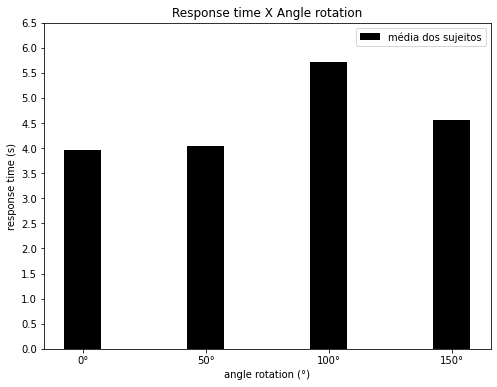

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

plt.bar((0, 50, 100, 150),(zero_mean, fif_mean, hund_mean, fifh_mean), color = 'Black', width = 15, label = 'média dos sujeitos')

plt.xticks((0, 50, 100, 150), ('0°', '50°', '100°', '150°'))

plt.yticks(np.arange(0, 7, 0.5))
plt.legend(loc = 0)

plt.ylabel('response time (s)')
plt.xlabel('angle rotation (°)')
plt.title('Response time X Angle rotation')

____________________________________________________________________________________
#response time x error rate